In [1]:
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import pandas as pd


In [3]:

url_page = 'https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000'

page = requests.get(url_page).text 
soup = BeautifulSoup(page, "lxml")

print (page)




<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head data-idioma="esp" data-hora-act="Tue, 26 Oct 2021 15:19:36 GMT" data-app-path="/" data-bolsa="BMadrid" data-analytics-id="UA-35966870-2"><meta http-equiv="X-UA-Compatible" content="IE=11" /><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta id="ctl00_copyright" name="copyright" content="Copyright © BME 2021" /><title>
	Bolsa de Madrid - Precios de la sesión
</title><link id="ctl00_RSSLink1" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=Todo" title="Bolsa de Madrid: Todos los contenidos agregados" /><link id="ctl00_RSSLink2" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" title="Bolsa de Madrid: Notas de Prensa" /><link id="ctl00_RSSLink3" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=Regula

In [4]:
print (soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head data-analytics-id="UA-35966870-2" data-app-path="/" data-bolsa="BMadrid" data-hora-act="Tue, 26 Oct 2021 15:19:36 GMT" data-idioma="esp"><meta content="IE=11" http-equiv="X-UA-Compatible"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="Copyright © BME 2021" id="ctl00_copyright" name="copyright"/><title>
	Bolsa de Madrid - Precios de la sesión
</title><link href="/esp/aspx/RSS/RSS.ashx?feed=Todo" id="ctl00_RSSLink1" rel="alternate" title="Bolsa de Madrid: Todos los contenidos agregados" type="application/rss+xml"/><link href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" id="ctl00_RSSLink2" rel="alternate" title="Bolsa de Madrid: Notas de Prensa" type="application/rss+xml"/><link href="/esp/aspx/RSS/RSS.ashx?feed=Regulacion" id="ctl00_RSSLink3" rel="alternate" title="Bolsa de Madrid: Reg

In [5]:
tabla = soup.find('table', attrs={'id': 'ctl00_Contenido_tblAcciones'})
tabla
name=""
price=""
var = ""
maxima = ""
minima = ""
nroFila=0
for fila in tabla.find_all("tr"):
    #for row in  tabla.find_all("td")::
    nroCelda=0
    for celda in fila.find_all('td'):
        if nroCelda==0:
            name=celda.text
            print("Accion:", name)
        if nroCelda==1:
            price=celda.text
            print("Valor:", price)
        if nroCelda==2:
            var=celda.text
            print("Variacion:", var)
        if nroCelda==3:
            maxima=celda.text
            print("Maxima:", maxima)
        if nroCelda==4:
            minima=celda.text
            print("Minima:", minima)
        nroCelda=nroCelda+1
    nroFila=nroFila+1

    with open('bolsa_acciones.csv', 'a') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow([name, price , var , maxima , minima ,datetime.now()])
        

df = pd.read_csv('bolsa_acciones.csv')
df.columns = ["Nombre", "Precio", "Variacion", "Maxima", "Minima", "Fecha"]
df.to_csv('bolsa_acciones.csv')

print(df)





Accion: ACCIONA
Valor: 161,3000
Variacion: -0,80
Maxima: 164,1000
Minima: 160,6000
Accion: ACERINOX
Valor: 11,9750
Variacion: 1,44
Maxima: 12,0800
Minima: 11,8150
Accion: ACS
Valor: 23,0200
Variacion: 0,96
Maxima: 23,1800
Minima: 22,8800
Accion: AENA
Valor: 141,8500
Variacion: 1,61
Maxima: 142,7500
Minima: 138,6500
Accion: ALMIRALL
Valor: 12,8000
Variacion: -0,08
Maxima: 13,0000
Minima: 12,7600
Accion: AMADEUS
Valor: 56,8400
Variacion: 3,12
Maxima: 57,3000
Minima: 54,7000
Accion: ARCELORMIT.
Valor: 28,8600
Variacion: 1,62
Maxima: 29,0600
Minima: 28,5550
Accion: B.SANTANDER
Valor: 3,3480
Variacion: 0,89
Maxima: 3,3690
Minima: 3,3105
Accion: BA.SABADELL
Valor: 0,6684
Variacion: -0,54
Maxima: 0,6754
Minima: 0,6604
Accion: BANKINTER
Valor: 4,7300
Variacion: -0,53
Maxima: 4,7980
Minima: 4,7140
Accion: BBVA
Valor: 5,6580
Variacion: -0,75
Maxima: 5,7350
Minima: 5,6110
Accion: CAIXABANK
Valor: 2,5960
Variacion: -0,35
Maxima: 2,6210
Minima: 2,5850
Accion: CELLNEX
Valor: 54,0000
Variacion: 0,04


ValueError: Length mismatch: Expected axis has 7 elements, new values have 6 elements

'-1,38'

In [6]:
df = pd.read_csv ('bolsa_acciones.csv', index_col="Nombre") #leo el archivo csv ya guardado e indexo la columna que me interesa

df #imprime la variable df

#df.head () #muestra los primeros 5 filas
#df.tail () #muestra las ultimas 5 filas, si le agrego el valor dentro del parametro me muestra el numero que le pido (10)
#df.describe() #muestra estadistica de las columnas

,Unnamed: 0,Precio,Variacion,Maxima,Minima,Fecha
Nombre,,,,,,
ACCIONA,0,"157,8000","1,15","158,9000","154,2000",2021-10-21 18:17:24.068841
ACERINOX,1,"11,4900","-2,25","11,6800","11,4000",2021-10-21 18:17:24.068841
ACS,2,"23,0500","0,22","23,2900","22,7600",2021-10-21 18:17:24.068841
AENA,3,"141,0000","-2,08","142,4500","139,7500",2021-10-21 18:17:24.068841
ALMIRALL,4,"12,7500","0,39","12,8400","12,6400",2021-10-21 18:17:24.068841
...,...,...,...,...,...,...
"11,6400",REPSOL,"-0,33","11,7100","11,4680",2021-10-26 10:20:29.772730,NaN
"22,3600",SIEMENS GAME,"2,99","22,5400","21,7600",2021-10-26 10:20:29.772730,NaN
"16,6500",SOLARIA,"2,56","16,8000","16,3000",2021-10-26 10:20:29.772730,NaN


In [15]:
#filtrado de datos

#filtrado de una columna
variacion1=df['Variacion']

variacion1

Nombre
ACCIONA        1,15
ACERINOX      -2,25
ACS            0,22
AENA          -2,08
ALMIRALL       0,39
             ...   
11,6400     11,7100
22,3600     22,5400
16,6500     16,8000
3,7740       3,8055
55,8500     56,1500
Name: Variacion, Length: 251, dtype: object

In [11]:
#muestra una fila, cambiando el numero de los corchetes le pido que fila mostrar
df.iloc[7]


Unnamed: 0                             7
Precio                            3,3135
Variacion                          -1,38
Maxima                            3,3500
Minima                            3,2970
Fecha         2021-10-21 18:17:24.084446
Name: B.SANTANDER, dtype: object

In [12]:
df.iloc[10]

Unnamed: 0                            10
Precio                            5,6610
Variacion                          -2,90
Maxima                            5,7870
Minima                            5,6370
Fecha         2021-10-21 18:17:24.084446
Name: BBVA, dtype: object

In [13]:
#muestra las filas que quiero del archivo bolda este es por indice

df.iloc [[7,10,30,33]]

,Unnamed: 0,Precio,Variacion,Maxima,Minima,Fecha
Nombre,,,,,,
B.SANTANDER,7,"3,3135","-1,38","3,3500","3,2970",2021-10-21 18:17:24.084446
BBVA,10,"5,6610","-2,90","5,7870","5,6370",2021-10-21 18:17:24.084446
REPSOL,30,"11,4520","-2,04","11,6600","11,4440",2021-10-21 18:17:24.131317
TELEFONICA,33,"3,7905","-1,20","3,8685","3,7905",2021-10-21 18:17:24.131317


In [20]:
#filtrar filas y columnas (el códico me parece esta bien, pero el problema me surge )

df.iloc [[7,10,30,33], ['Variacion']]

IndexingError: Too many indexers

In [21]:
#Devuelve información (número de filas, número de columnas, índices, tipo de las columnas y memoria usado) sobre el DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, ACCIONA to 55,8500
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  245 non-null    object
 1   Precio      245 non-null    object
 2   Variacion   245 non-null    object
 3   Maxima      245 non-null    object
 4   Minima      251 non-null    object
 5   Fecha       35 non-null     object
dtypes: object(6)
memory usage: 17.8+ KB


In [22]:
#Devuelve una tupla con el número de filas y columnas del DataFrame
df.shape

(251, 6)

In [23]:
#Devuelve una lista con los nombres de las columnas del DataFrame
df.columns

Index(['Unnamed: 0', 'Precio', 'Variacion', 'Maxima', 'Minima', 'Fecha'], dtype='object')

In [24]:
#Devuelve una lista con los nombres de las filas del DataFrame
df.index

Index([    'ACCIONA',    'ACERINOX',         'ACS',        'AENA',
          'ALMIRALL',     'AMADEUS', 'ARCELORMIT.', 'B.SANTANDER',
       'BA.SABADELL',   'BANKINTER',
       ...
            '6,3900',      '9,3720',     '22,1900',     '70,2000',
           '17,5800',     '11,6400',     '22,3600',     '16,6500',
            '3,7740',     '55,8500'],
      dtype='object', name='Nombre', length=251)

In [25]:
#Devuelve una serie con los tipos de datos de las columnas del DataFrame 

df.dtypes

Unnamed: 0    object
Precio        object
Variacion     object
Maxima        object
Minima        object
Fecha         object
dtype: object

In [28]:
#imprime la variacion de Santander

santander=df.loc['B.SANTANDER', 'Variacion']

santander

'-1,38'

In [29]:
telefonica=df.loc['TELEFONICA', 'Variacion']
telefonica

'-1,20'

In [30]:
repsol=df.loc['REPSOL', 'Variacion']
repsol

'-2,04'

In [31]:
bbva=df.loc['BBVA', 'Variacion']
bbva

'-2,90'

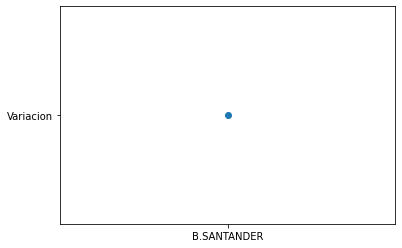

In [32]:
# Importar el módulo pyplot con el alias plt
import matplotlib.pyplot as plt
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x = ['B.SANTANDER'], y = ['Variacion'])

# Guardar el gráfico en formato png
plt.savefig('Santander.png')
# Mostrar el gráfico
plt.show()


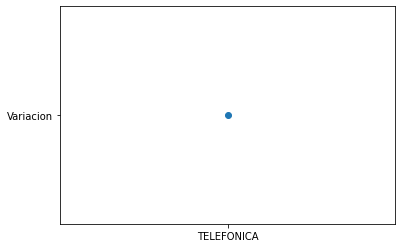

In [33]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x = ['TELEFONICA'], y = ['Variacion'])

# Guardar el gráfico en formato png
plt.savefig('Telefonica.png')
# Mostrar el gráfico
plt.show()

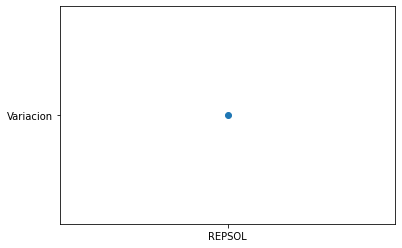

In [34]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x = ['REPSOL'], y = ['Variacion'])

# Guardar el gráfico en formato png
plt.savefig('repsol.png')
# Mostrar el gráfico
plt.show()




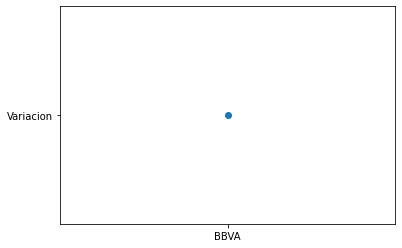

In [35]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x = ['BBVA'], y = ['Variacion'])

# Guardar el gráfico en formato png
plt.savefig('BBVA.png')
# Mostrar el gráfico
plt.show()